In [10]:
import pathlib
import imageio
import numpy as np
import pandas as pd
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# for viewing images
from IPython.display import Image
from IPython.display import display

In [45]:
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])


def process_image(image_path):
    im = imageio.imread(str(image_path))
    im_gray = rgb2gray(im)
    
    # create mask
    thresh_val = threshold_otsu(im_gray)
    mask = np.where(im_gray > thresh_val, 1, 0)
    # ensure larger part of mask is background
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
        
    # remove small bits of noise from mask
    labels, nlabels = ndimage.label(mask)
    for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
        cell = mask[label_coords]
        if np.product(cell.shape) < 20:
            # update mask, removing noise
            mask = np.where(labels==label_ind+1, 0, mask)
    
    # generate RLE dataframe
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 20:
            rle = rle_encoding(label_mask)
            s = pd.Series({'ImageId': image_path.stem, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
            
    return im_df


def process_all_images(im_list):
    all_df = pd.DataFrame()
    for idx, im_path in enumerate(im_list):
        print(f'{idx} / {len(im_list)}')
        im_df = process_image(im_path)
        all_df = all_df.append(im_df, ignore_index=True)
    return all_df

In [48]:
training_paths = pathlib.Path('data/stage1_train').glob('*/images/*.png')
training_sorted = sorted(x for x in training_paths)

training_df = process_all_images(training_sorted)

0 / 670
1 / 670
2 / 670
3 / 670
4 / 670
5 / 670
6 / 670
7 / 670
8 / 670
9 / 670
10 / 670
11 / 670
12 / 670
13 / 670
14 / 670
15 / 670
16 / 670
17 / 670
18 / 670
19 / 670
20 / 670
21 / 670
22 / 670
23 / 670
24 / 670
25 / 670
26 / 670
27 / 670
28 / 670
29 / 670
30 / 670
31 / 670
32 / 670
33 / 670
34 / 670
35 / 670
36 / 670
37 / 670
38 / 670
39 / 670
40 / 670
41 / 670
42 / 670
43 / 670
44 / 670
45 / 670
46 / 670
47 / 670
48 / 670
49 / 670
50 / 670
51 / 670
52 / 670
53 / 670
54 / 670
55 / 670
56 / 670
57 / 670
58 / 670
59 / 670
60 / 670
61 / 670
62 / 670
63 / 670
64 / 670
65 / 670
66 / 670
67 / 670
68 / 670
69 / 670
70 / 670
71 / 670
72 / 670
73 / 670
74 / 670
75 / 670
76 / 670
77 / 670
78 / 670
79 / 670
80 / 670
81 / 670
82 / 670
83 / 670
84 / 670
85 / 670
86 / 670
87 / 670
88 / 670
89 / 670
90 / 670
91 / 670
92 / 670
93 / 670
94 / 670
95 / 670
96 / 670
97 / 670
98 / 670
99 / 670
100 / 670
101 / 670
102 / 670
103 / 670
104 / 670
105 / 670
106 / 670
107 / 670
108 / 670
109 / 670
110 / 670


In [34]:
def display_processed_image(image_path):
    im = imageio.imread(str(image_path))
    im_gray = rgb2gray(im)
    imageio.imwrite('/tmp/im.png', im)
    imageio.imwrite('/tmp/im_gray.png', im_gray)
    
    # create mask
    thresh_val = threshold_otsu(im_gray)
    mask = np.where(im_gray > thresh_val, 1, 0)
    # ensure larger part of mask is background
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
    imageio.imwrite('/tmp/mask.png', mask)
        
    # remove small bits of noise from mask
    labels, nlabels = ndimage.label(mask)
    for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
        cell = mask[label_coords]
        if np.product(cell.shape) < 20:
            # update mask, removing noise
            mask = np.where(labels==label_ind+1, 0, mask)
    imageio.imwrite('/tmp/mask_clean.png', mask)
    
    display(Image('/tmp/im.png'))
    display(Image('/tmp/im_gray.png'))
    display(Image('/tmp/mask.png'))
    display(Image('/tmp/mask_clean.png'))

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))
/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 1]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


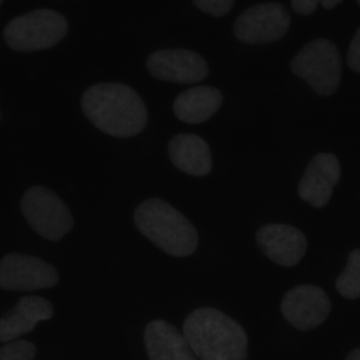

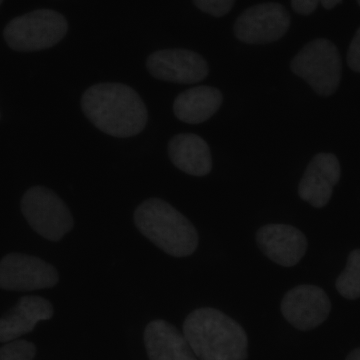

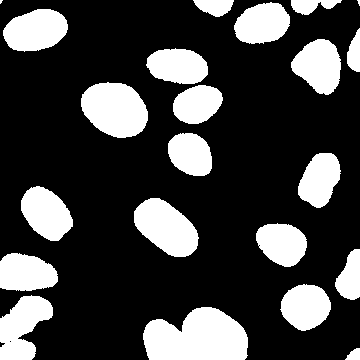

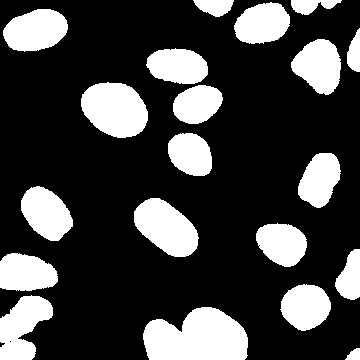

In [36]:
display_processed_image(training_sorted[200])

In [50]:
training_df.to_csv('submission.csv', index=False)

In [51]:
test_paths = pathlib.Path('data/stage1_test').glob('*/images/*.png')
test_sorted = sorted(x for x in test_paths)

test_df = process_all_images(test_sorted)

0 / 65
1 / 65
2 / 65
3 / 65
4 / 65
5 / 65
6 / 65
7 / 65
8 / 65
9 / 65
10 / 65
11 / 65
12 / 65
13 / 65
14 / 65
15 / 65
16 / 65
17 / 65
18 / 65
19 / 65
20 / 65
21 / 65
22 / 65
23 / 65
24 / 65
25 / 65
26 / 65
27 / 65
28 / 65
29 / 65
30 / 65
31 / 65
32 / 65
33 / 65
34 / 65
35 / 65
36 / 65
37 / 65
38 / 65
39 / 65
40 / 65
41 / 65
42 / 65
43 / 65
44 / 65
45 / 65
46 / 65
47 / 65
48 / 65
49 / 65
50 / 65
51 / 65
52 / 65
53 / 65
54 / 65
55 / 65
56 / 65
57 / 65
58 / 65
59 / 65
60 / 65
61 / 65
62 / 65
63 / 65
64 / 65


In [53]:
test_df.to_csv('data/submission.csv', index=False)